<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Gradient Descent in Linear Regression
</h2>
</div>    
</center>

Gradient Descent is an iterative first-order optimisation algorithm, used to find a local minimum/maximum of a given function. This method is commonly used in Machine Learning and Deep Learning to minimise a cost/loss function (e.g. in a linear regression).

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Data](#data)
- ### [Exploratory Data Analysis](#eda)
- ### [Preprocessing](#preprocessing)
- ### [Model](#model)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Gradient Descent
</h2>
</div>    
</center>

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Linear Regression
</h2>
</div>    
</left>

To get a better understanding of the algorithmic choices, we will go through the calculus that motivates making predictions based on data for our future model. In this case, we decided to use a linear regression function. If our objective were a classification problem, we would use a logistic regression function.

$$\hat{y} = mx + b$$

- $\hat{y}$ - is the model prediction, evaluated from the function result.
- $m $ - is the slope of the regression function givin.
- $b $ - represent the intercept in the regression function.

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Cost-Function
</h2>
</div>    
</left>

To produce a well-fitting line, the algorithm calculates the mean squared error for each epoch.

$$C_{(\overline{y}, \hat{y})} = \frac{1}{N}\sum_{i = 1}^{N}(\overline{y}_{i} - \hat{y}_{i})^{2} \rightarrow \frac{1}{N}\sum_{i = 1}^{N}(\overline{y}_{i} - (mx_{i} + b))^{2}$$

- $\overline{y}$ - is the true target values.
- $\hat{y}$ - is the model prediction, evaluated from the function result.

Since the task is to find the minima of the function givin, we need to find the minimum of the C function. \
To do this, we need to estimate parameters ($m$ and $b$) that will reduce the C function.

$$\min_{m, b} C_{(\overline{y}, \hat{y})} \rightarrow \min_{m, b} \frac{1}{N}\sum_{i = 1}^{N}(\overline{y}_{i} - (mx_{i} + b))^{2}$$

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Power Rule & Chain Rule
</h2>
</div>    
</left>

We will do this with the help of the derivatives and two calculus rules (an overview without details):

- **The Power Rule**
$$\frac{\partial }{\partial x}x^{n} = n \cdot x^{n - 1}$$

- **The Chain Rule**
$$error \leftarrow (\overline{y} - \hat{y}) \leftarrow (\overline{y}_{i} - (mx_{i} + b))$$

$$\frac{\partial L_{(m, b)}}{\partial m} = \frac{\partial L_{(m, b)}}{\partial error} * \frac{\partial error}{\partial m}$$

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Derivatives
</h2>
</div>    
</left>

Now we calculate the derivatives for each parameter.
- $C(m, b)$ with respect to $m$ (*slope*):

$$\begin{aligned}
\frac{\partial C_{(m, b)}}{\partial m} &= \frac{\partial }{\partial m}(\frac{1}{N}\sum_{i = 1}^{N}(\overline{y}_{i} - (mx_{i} - b))^{2}) \\
&= \frac{1}{N}\sum_{i = 1}^{N}\underbrace{\frac{\partial }{\partial m}(\overline{y} - mx_{i} - b)^{2}}_{= -x_{i}} \\
&= \frac{1}{N}\sum_{i = 1}^{N}-2x_{i}(\overline{y} - mx_{i} - b) \\
&= \frac{2}{N}\sum_{i = 1}^{N}-x_{i}(\overline{y} - mx_{i} - b)
\end{aligned}$$

- $C(m, b)$ with respect to $b$ (*intercept*):

$$\begin{aligned}
\frac{\partial C_{(m, b)}}{\partial b} &= \frac{\partial }{\partial b}(\frac{1}{N}\sum_{i = 1}^{N}(\overline{y}_{i} - (mx_{i} - b))^{2}) \\
&= \frac{1}{N}\sum_{i = 1}^{N}\underbrace{\frac{\partial }{\partial b}(\overline{y} - mx_{i} - b)^{2}}_{= -1} \\
&= \frac{2}{N}\sum_{i = 1}^{N}-(\overline{y} - mx_{i} - b)
\end{aligned}$$

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">$\Delta m$ & $\Delta b$
</h2>
</div>    
</left>

And to make progress in the right direction, the algorithm needs some changes in the parameters. Applying a learning rate helps not only to update the parameters, but also to make smaller steps depending on the calculated updates.

$$
\begin{aligned}
\Delta m &= m - \alpha \cdot \frac{\partial C_{(m, b)}}{\partial m} \\
\Delta b &= b - \alpha \cdot \frac{\partial C_{(m, b)}}{\partial b}
\end{aligned}
$$

- $\alpha$ - selected learning rate.

The algorithm will iterate through the data over the given epochs, getting closer to the minimum with each epoch. 

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Mini-Batch Gradient Descent
</h2>
</div>    
</center>

This time we increase the potential of gradient descent by introducing some optimisation changes to the algorithm:

- **Use the mini-batch technique** \
Reducing the number of samples processed in each batch decreases memory requirements for storing intermediate activations and gradients during training.

- **Decay the learning rate** \
By setting up the batches, the model will also reduce the learning rate, allowing the model to take smaller steps as it gets closer to the minima.

[UP](#toc)

<a id = 'data'></a>
<center>
<div style = "color: #FFFFFF
          ; display: fill
          ; border-radius: 10px
          ; background-color: #FFFFFF
          ; font-size: 110%
          ; letter-spacing: 0.5px;">

<h2 style = "background-color: #212121
             ; padding: 10px;">Data
</h2>
</div>
</center>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import OneClassSVM

import umap

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

## Dataset

The cost of a small sample of USA population Medical Insurance Cost based on some attributes depicted on "Content".

## Features
- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

In [2]:
df = pd.read_csv('assets/gradient_descent/medical-charges.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

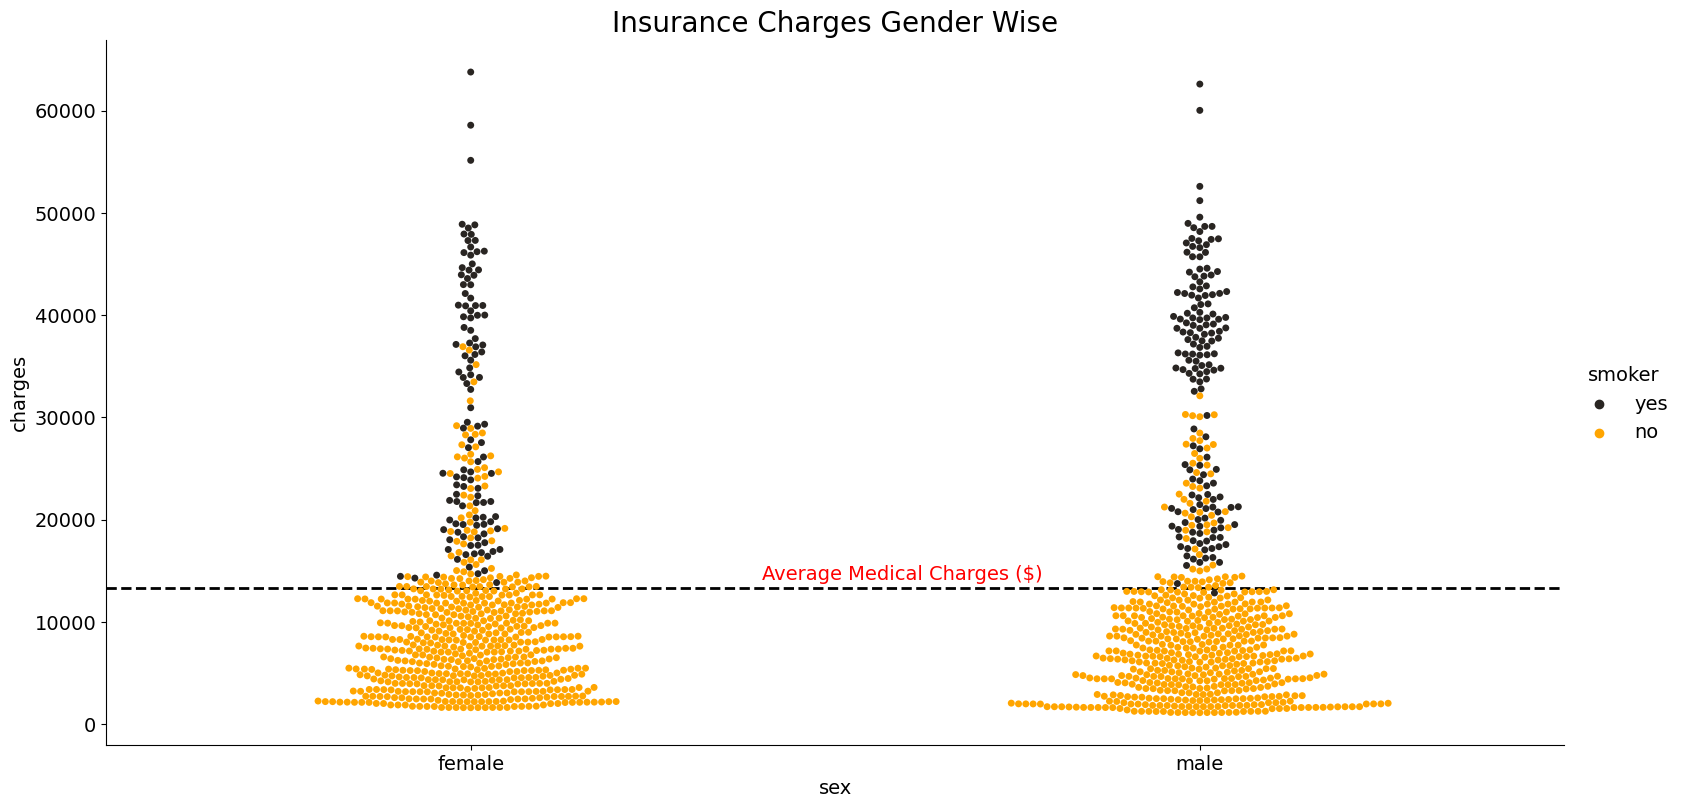

In [6]:
sns.catplot(data = df, x = 'sex', y = 'charges'
            , kind = 'swarm', hue = 'smoker'
            , aspect = 2, height = 8, color = 'orange')
plt.axhline(df['charges'].mean(), linestyle = '--'
            , lw = 2, zorder = 1, color = 'black')
plt.annotate(f'Average Medical Charges ($)', (.4, df['charges'].mean() + 900)
            , fontsize = 14, color = 'red')
plt.title('Insurance Charges Gender Wise', fontsize = 20)
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Male smokers are likely to spend more on insurance charges.
</div>

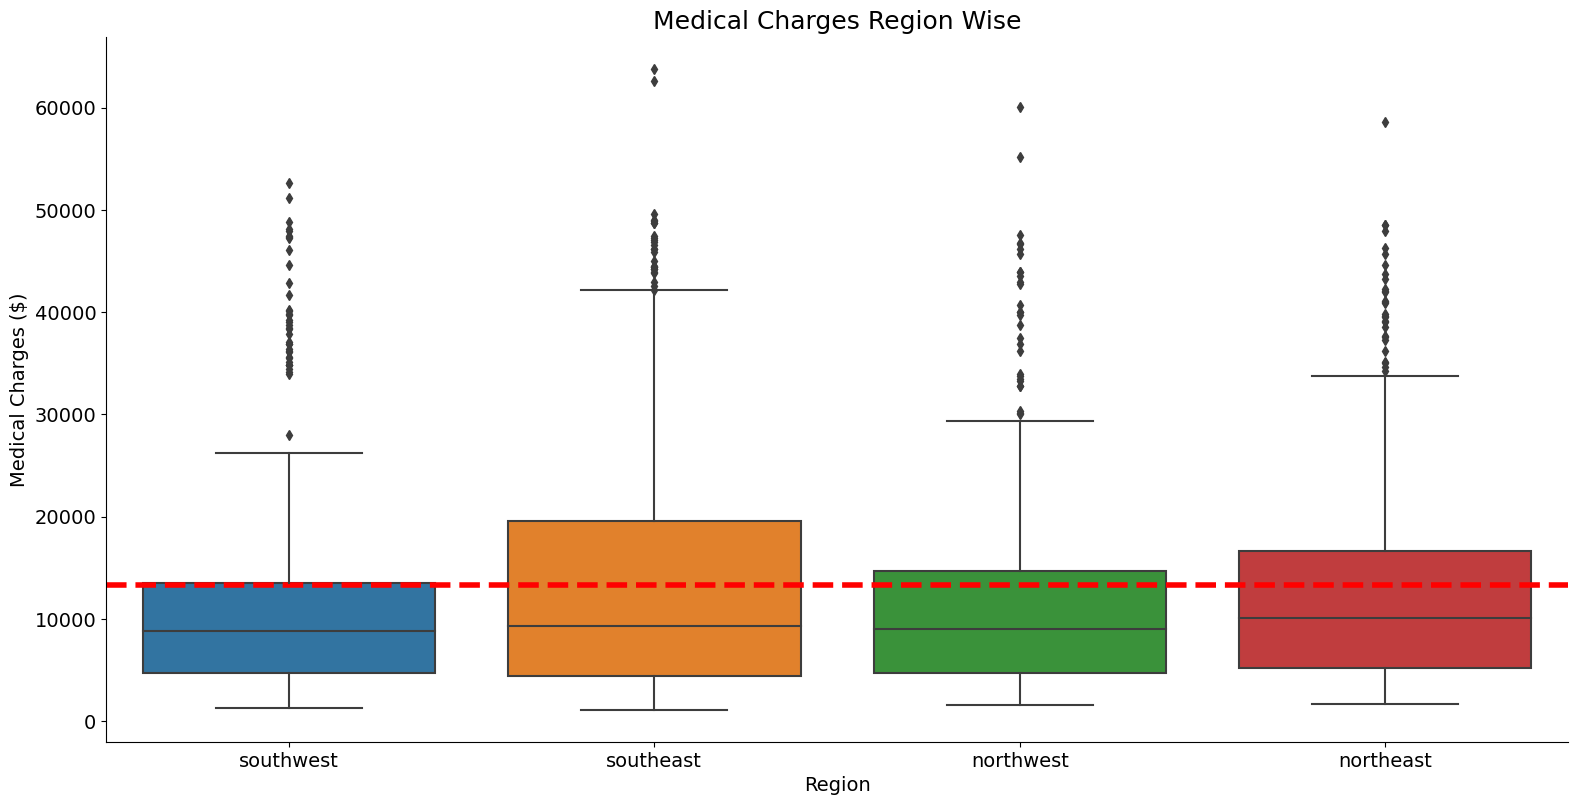

In [7]:
sns.catplot(data = df, x = 'region', y = 'charges'
            , kind = 'box', aspect = 2, height = 8)
plt.axhline(df['charges'].mean(), linestyle = '--'
            , lw = 4, zorder = 1, color = 'red')
plt.title('Medical Charges Region Wise', fontsize = 18)
plt.xlabel('Region')
plt.ylabel('Medical Charges ($)')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  The range of insurance costs incurred by people in the south-east region is the highest compared with people in the north-east and south-east.
</div>

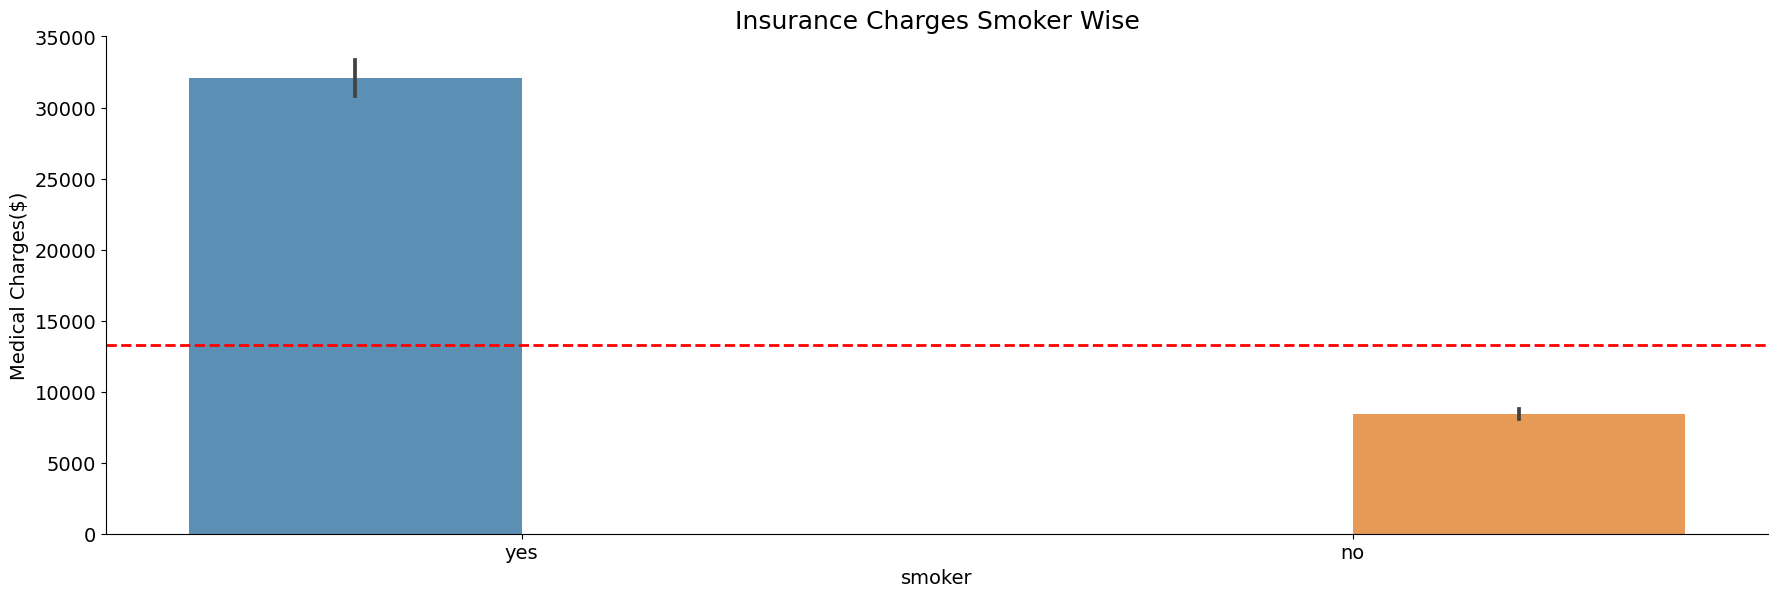

In [8]:
sns.catplot(data = df, x = 'smoker', y = 'charges', hue = 'smoker', kind = 'bar', aspect = 3, height = 6, alpha = .8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['charges'].mean(), linestyle = '--', lw = 2, zorder = 1, color = 'red')
plt.title('Insurance Charges Smoker Wise', fontsize = 18)
plt.ylabel('Medical Charges($)')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Smokers end up paying more for insurance than those who don't smoke.
</div>

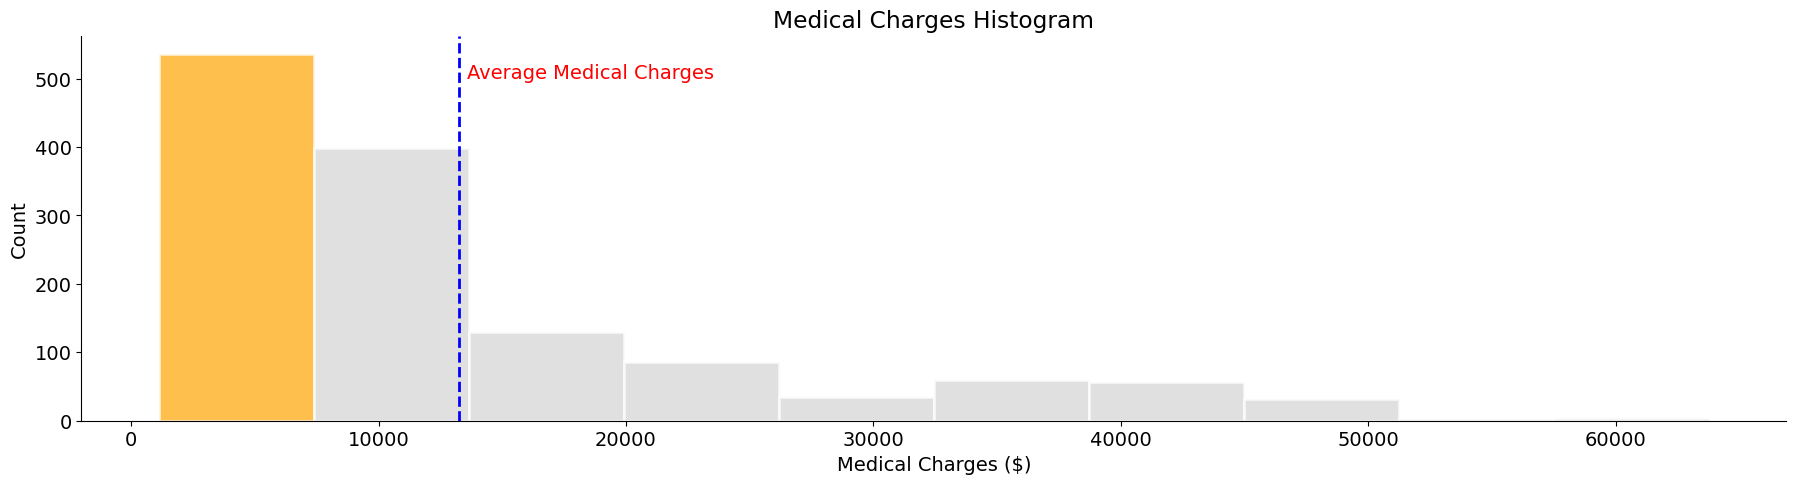

In [9]:
fig, ax = plt.subplots()

N, bins, patches = ax.hist(np.array(df['charges']), alpha = .7, edgecolor = 'white', color = 'lightgrey', linewidth = 2)

for i in range(0,1):
    patches[i].set_facecolor('orange')
    plt.title('Medical Charges Histogram')
    plt.xlabel('Medical Charges ($)', fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axvline(df['charges'].mean(), color = 'blue', lw = 2, linestyle = '--')
    plt.annotate('Average Medical Charges', (df['charges'].mean()+ 300, 500), color = 'red', fontsize = 14)

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Most people pay insurance fees ranging from USD 0 to USD 7K.
</div>

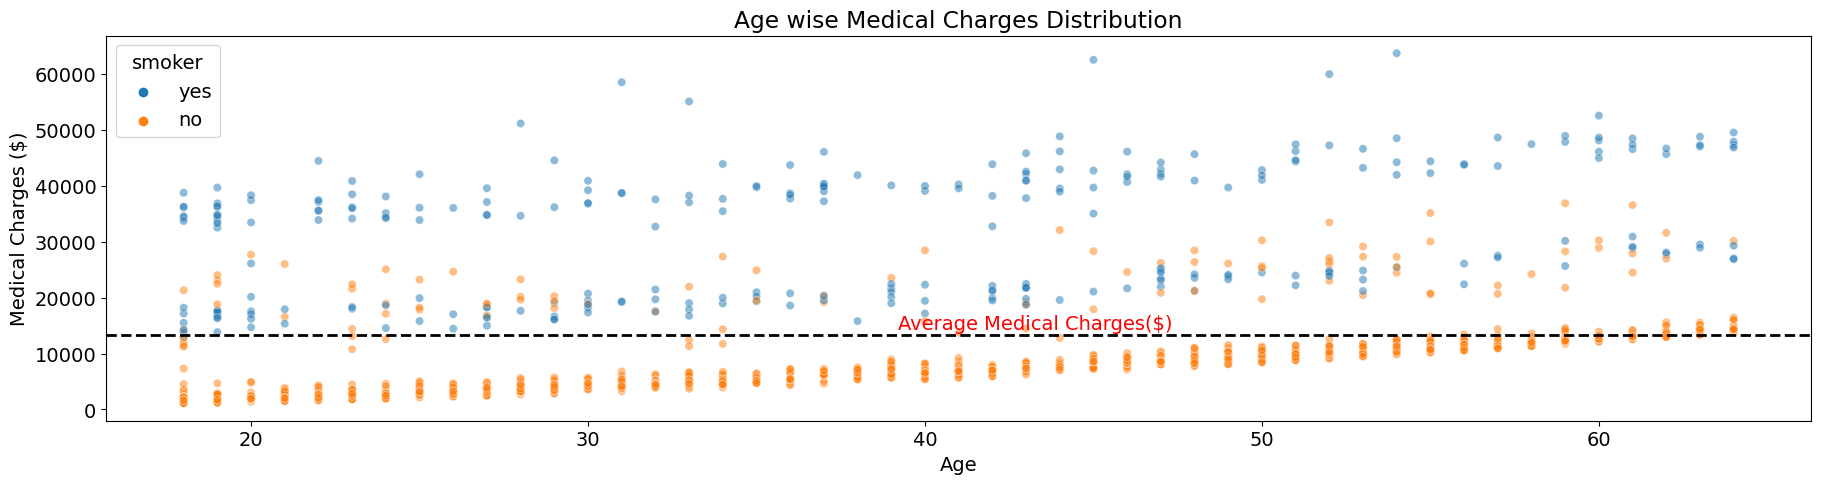

In [10]:
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker', alpha = .5)
plt.title('Age wise Medical Charges Distribution')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Medical Charges ($)')
plt.axhline(df['charges'].mean(), lw = 2, color = 'black', linestyle = '--')
plt.annotate('Average Medical Charges($)', (df['age'].mean(), df['charges'].mean()+ 1000), fontsize = 14, color = 'red')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Older smokers pay more for insurance than older non-smokers.
</div>

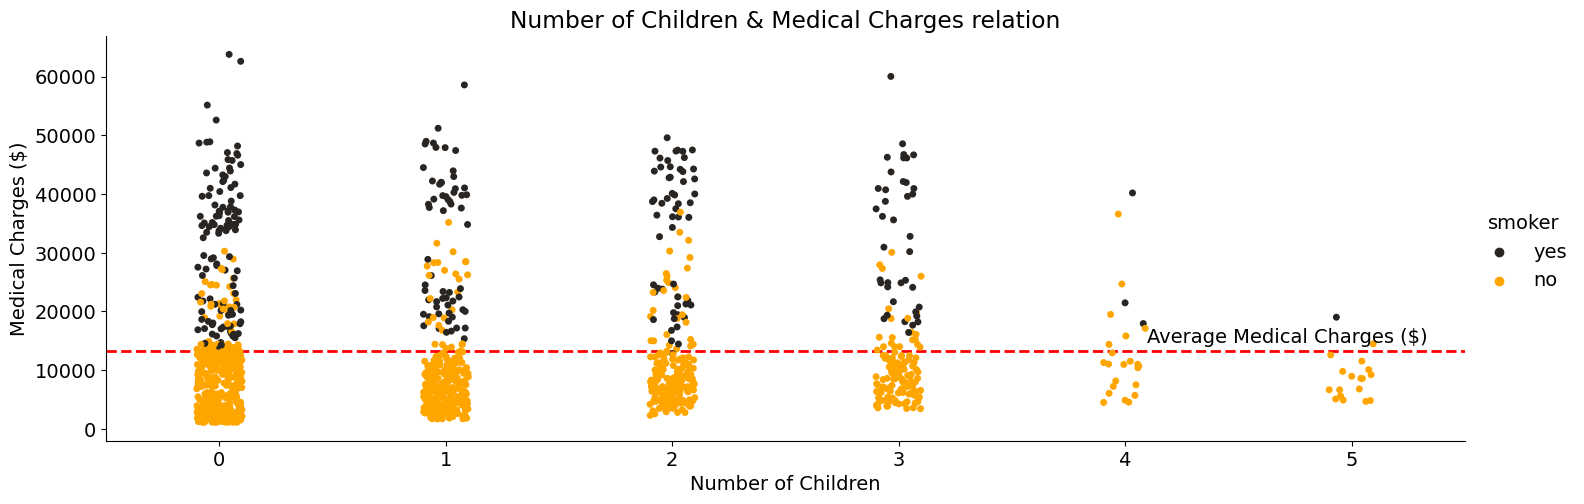

In [11]:
sns.catplot(data = df, y = 'charges', x = 'children', hue = 'smoker', aspect = 3, height = 5, color = 'orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(df['charges'].mean(), lw = 2, color = 'red', linestyle = '--')
plt.annotate('Average Medical Charges ($)', (df['children'].mean()+ 3, df['charges'].mean() + 1500)
             , color = 'black', fontsize = 14)
plt.xlabel('Number of Children', fontsize = 14)
plt.ylabel('Medical Charges ($)')
plt.title('Number of Children & Medical Charges relation')
plt.show()

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  People with 0, 1 or 3 children are likely to spend more on insurance if no group imbalance is taken into account.
</div>

[UP](#toc)

<a id = 'preprocessing'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Preprocessing
</h2>
</div>    
</center>

## Outlier detection

- [Quantile](#preprocessing_quantile)
- [3 Standard Deviations](#preprocessing_3std)
- [Encoder](#preprocessing_encoder)
- [OneClassSVM](#preprocessing_oneclasssvm)
- [Summary of outlier detection](#preprocessing_summary)

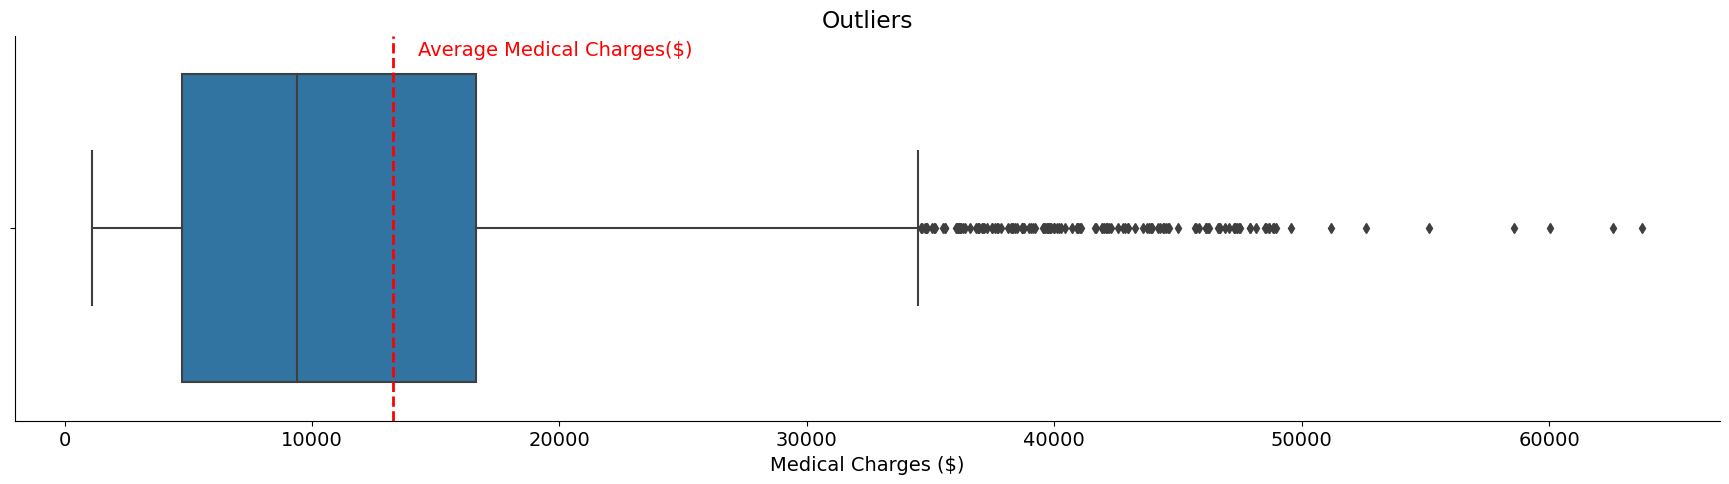

In [12]:
sns.boxplot(x = df['charges'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(df['charges'].mean(), color = 'red', lw = 2, linestyle = '--')
plt.annotate('Average Medical Charges($)', (df['charges'].mean()+1000, -.45), color = 'red')
plt.xlabel('Medical Charges ($)', fontsize = 14)
plt.title('Outliers')
plt.show()

<a id = 'preprocessing_quantile'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Quantile
</h2>
</div>    
</left>

[quantile] Outliers detected: 139


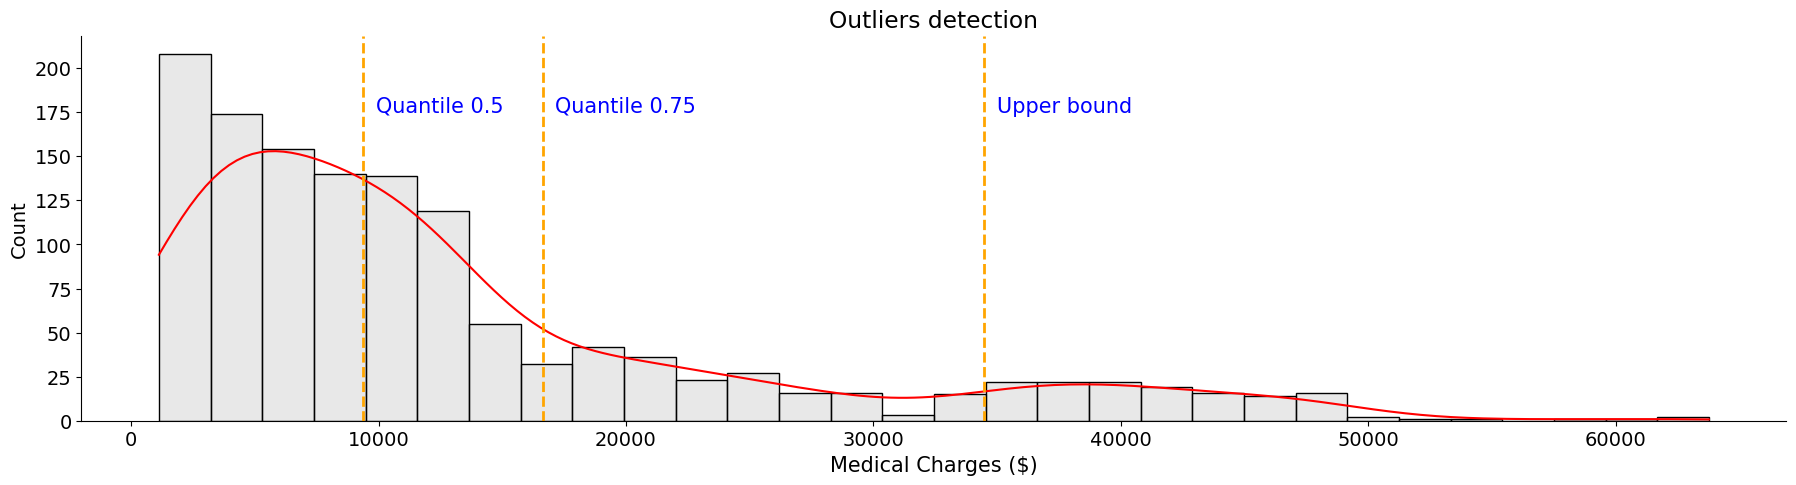

In [13]:
# Calculate cut off
q1 = np.quantile(df['charges'], .25)
q3 = np.quantile(df['charges'], .75)
q2 = np.quantile(df['charges'], .5)
IQR = q3 - q1

left_bound = q1 - 1.5*IQR
right_bound = q3 + 1.5*IQR

outliers_quantile = df[(df['charges'] > right_bound) | (df['charges'] < left_bound)]
print(f'[quantile] Outliers detected: {outliers_quantile.shape[0]}')

# Plot cut off
ax = sns.histplot(df['charges'], kde = True, color = 'lightgrey')
ax.lines[0].set_color('red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(q2, linestyle = '--', color = 'orange', lw = 2)
plt.annotate('Quantile 0.5', (q2+500, 175), color = 'blue', fontsize = 15)

plt.axvline(q3, linestyle = '--', color = 'orange', lw = 2)
plt.annotate('Quantile 0.75', (q3+500, 175), color = 'blue', fontsize = 15)

plt.axvline(right_bound, linestyle = '--', color = 'orange', lw = 2)
plt.annotate('Upper bound', (right_bound+500, 175), color = 'blue', fontsize = 15)

plt.title('Outliers detection')
plt.xlabel('Medical Charges ($)', fontsize = 15)
plt.show()

<a id = 'preprocessing_3std'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">3 Standard Deviations
</h2>
</div>    
</left>

[+/- 3 STD] Outliers detected: 7


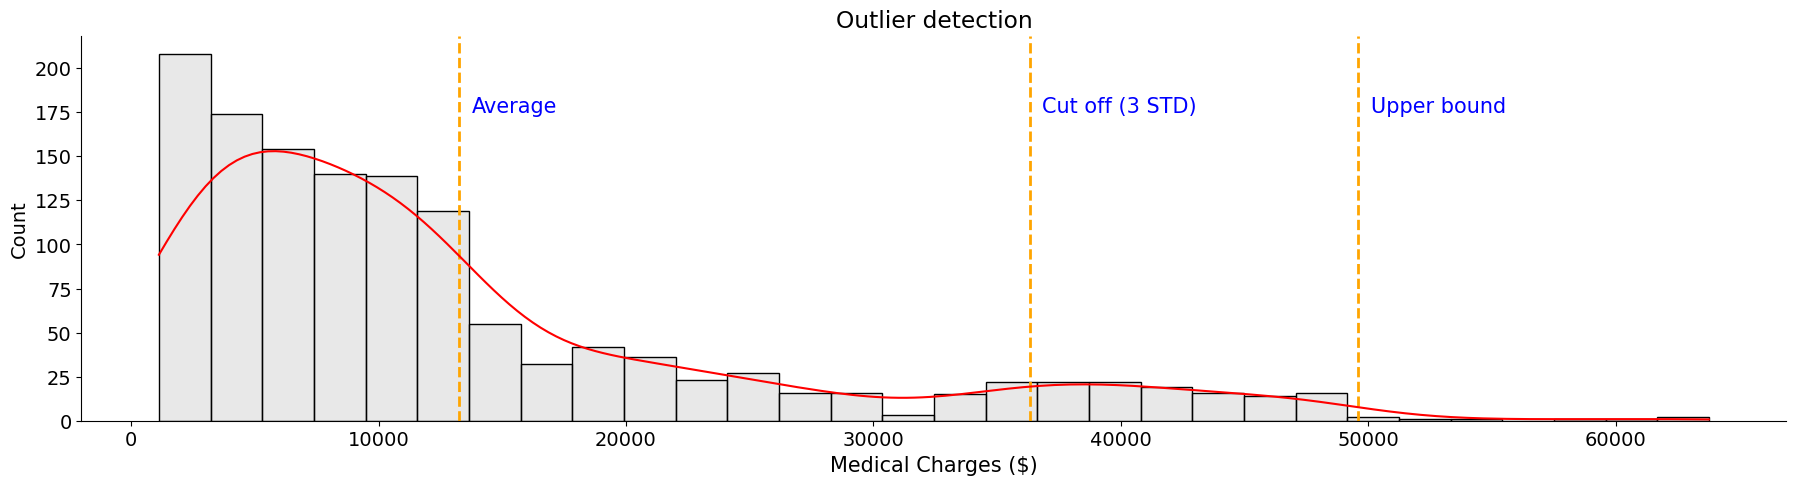

In [14]:
# Calculate cut off
charges_std = df['charges'].std()
charges_mean = df['charges'].mean()

cut_off = charges_std*3

left_bound = charges_mean - cut_off
right_bound = charges_mean + cut_off

outliers_std = df[(df['charges'] < left_bound) | (df['charges'] > right_bound)]
print(f'[+/- 3 STD] Outliers detected: {outliers_std.shape[0]}')

# Plot cut off
ax = sns.histplot(df['charges'], kde = True, color = 'lightgrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.lines[0].set_color('red')
plt.axvline(charges_mean, linestyle = '--', lw = 2, zorder = 1, color = 'orange')
plt.annotate('Average', (charges_mean+500, 175), fontsize = 15, color = 'blue')

plt.axvline(right_bound, linestyle = '--', lw = 2, zorder = 1, color = 'orange')
plt.annotate('Upper bound', (right_bound+500, 175), fontsize = 15, color = 'blue')

plt.axvline(cut_off, linestyle = '--', lw = 2, zorder = 1, color = 'orange')
plt.annotate('Cut off (3 STD)', (cut_off+500, 175), fontsize = 15, color = 'blue')

plt.title('Outlier detection')
plt.xlabel('Medical Charges ($)', fontsize = 15)
plt.show()

<a id = 'preprocessing_encoder'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Encoder
</h2>
</div>    
</left>

In [15]:
dummies_cols = df.select_dtypes('object').columns
df = pd.get_dummies(data = df, columns = dummies_cols
                    , prefix_sep = '_', dtype = 'int32')

<a id = 'preprocessing_oneclasssvm'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">OneClassSVM
</h2>
</div>    
</left>

#### OneClassSVM

In [16]:
x = df.drop(columns = 'charges').values
y = df['charges']

one = OneClassSVM(kernel = 'rbf', gamma = 'auto', nu = .25)
one.fit(x)
outliers = one.predict(x)

df['outliers'] = outliers

print(f'[OneClassSVM] Outliers detected: {df[df["outliers"] < 0].shape[0]}')

[OneClassSVM] Outliers detected: 383


#### Using UMAP for dimension reduction

In [17]:
reduce = umap.UMAP()

scaler = StandardScaler()
x = scaler.fit_transform(df.iloc[:, :-1])

embedding = reduce.fit_transform(x)

#### Plot OneClassSVM decisin function

[OneClassSVM] Outliers detected: 383
[UMAP] : 12-dimensional data reduced to 2-dimensional data


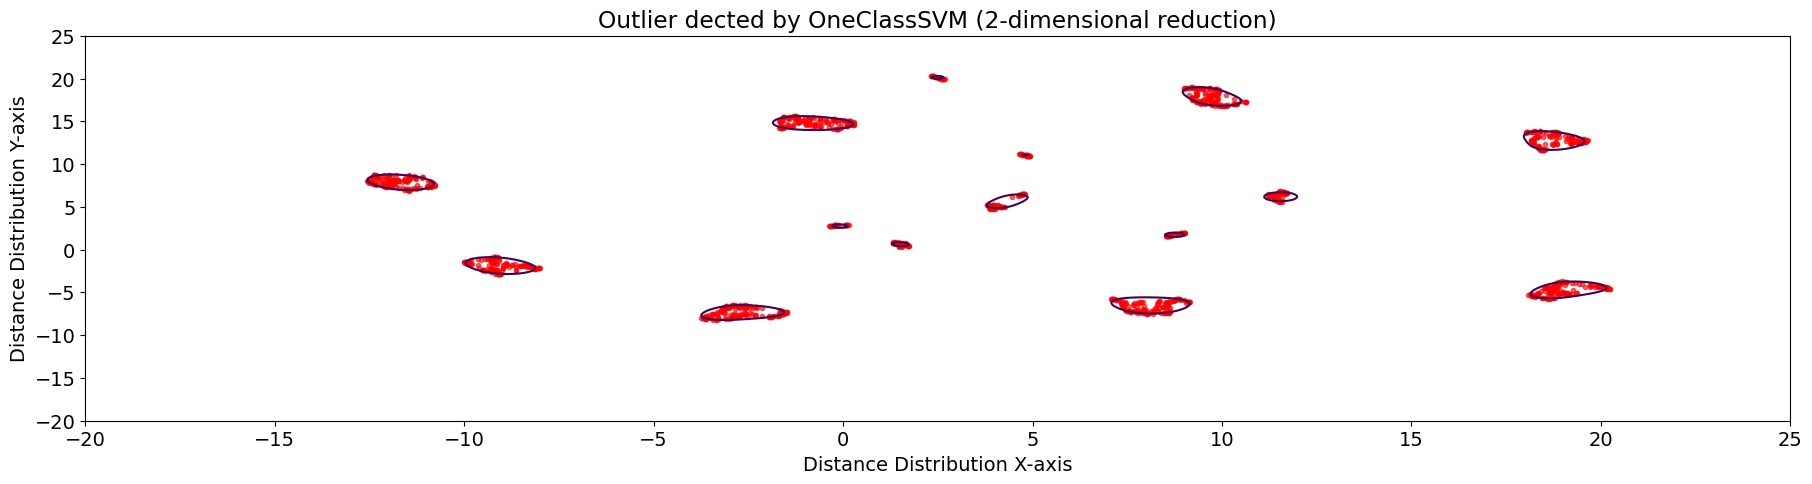

In [18]:
# Calculate cut off
print(f'[OneClassSVM] Outliers detected: {df[df["outliers"] < 0].shape[0]}')

# Dimensional reduction
print(f'[UMAP] : {x.shape[1]}-dimensional data reduced to {embedding.shape[1]}-dimensional data')

# Plot cut off
xx = np.linspace(-20, 25, 350)
yy = np.linspace(-20, 25, 350)

xx1, yy1 = np.meshgrid(xx, yy)

one = OneClassSVM(nu = .25, gamma = 'auto')
one.fit(embedding)

z = one.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
z = z.reshape(xx1.shape)

legend = {}
legend['OneClassSVM'] = plt.contour(xx1, yy1, z, levels = [0], linewidth = 3, color = 'r')

legend_values_list = list(legend.values())
legend_keys_list = list(legend.keys())

plt.figure(1)
plt.scatter(embedding[:, 0], embedding[:,1], color = 'r', alpha = .6, marker = '.')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))

plt.title('Outlier dected by OneClassSVM (2-dimensional reduction)')
plt.xlabel('Distance Distribution X-axis')
plt.ylabel('Distance Distribution Y-axis')

plt.show()

<a id = 'preprocessing_summary'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Summary of outlier detection
</h2>
</div>    
</left>

In [19]:
print(f'[quantile] Outliers detected: {outliers_quantile.shape[0]}')
print(f'[+/- 3 STD] Outliers detected: {outliers_std.shape[0]}')
print(f'[OneClassSVM] Outliers detected: {df[df["outliers"] < 0].shape[0]}')

[quantile] Outliers detected: 139
[+/- 3 STD] Outliers detected: 7
[OneClassSVM] Outliers detected: 383


In [20]:
# Quantile
#df = df.drop(index = outliers_quantile.index).reset_index(drop = True)

# STD
df = df.drop(index = outliers_std.index).reset_index(drop = True)

[UP](#toc)

<a id = 'model'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Model
</h2>
</div>    
</center>

- [Functions](#model_functions)
- [Train & Test](#model_train_test)
- [Gradient Descent](#model_gradient_descent)
- [Apply & Plot](#model_plot)

<a id = 'model_functions'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Functions
</h2>
</div>    
</left>

In [21]:
# Gradient Descent for Linear Regression
def gradient_descent_regression(X, y, m, b):
    yhat = np.dot(X, m) + b

    # Claculate MSE
    MSE = (np.sum((y - yhat)**2)) / N
    # Calculate R-squared
    r_squared = r2_score(y, yhat)

    # Loss function with respect to intercept 'b'
    loss_intercept_b = -(2/N) * sum(y - yhat)
    # Loss function with respect to the slope 'm'
    loss_slope_m = -(2/N) * (np.dot((y - yhat), X))

    # Update the slope 'm' and intercept 'b'
    m = m - (learning_rate * loss_slope_m)
    b = b - (learning_rate * loss_intercept_b)
    
    return m, b, MSE, r_squared

# Determine the number of batches
def batch_size(batchsize, X):
    batches = round(X.shape[0] // batchsize)
    return batches

# Calculate an early stop criterion
def early_stop(loss):
    for i in range(1, len(loss)):
        yield (loss[i-1], loss[i])

<a id = 'model_train_test'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Train & Test
</h2>
</div>    
</left>

In [112]:
X = df.drop(columns = ['charges', 'outliers']).values
y = df['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

# Scale the train and test samples
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id = 'model_gradient_descent'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Gradient Descent
</h2>
</div>    
</left>

In [113]:
# Random seed 
np.random.seed(11)

N = X.shape[0]

m = np.ones(X.shape[1])
b = 1

batchsize = 30
batches = batch_size(batchsize, X)
learning_rate = 0.2
decay_rate = 0.01
num_epochs =  2000

LR = []
TrainingLoss = []
ValidationLoss = []
Intercept = []
Slope = []

for i in range(num_epochs):
    epoch = i
    
    for j in range(batches):
        if i == 0:
            if j % batchsize == 0:
                learning_rate = learning_rate
                np.random.seed(0)
                np.random.shuffle([X_train_scaled, y_train])
                m, b, MSE, r_squared = gradient_descent_regression(X_train_scaled, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = gradient_descent_regression(X_test_scaled, y_test, m, b)
            else:
                m = m
                b = b
        else:
            if j % batchsize == 0:
                learning_rate = [(1 / (1 + decay_rate)) * learning_rate for j in range(batches)][0]
                np.random.seed(0)
                np.random.shuffle([X_train_scaled, y_train])
                m, b, MSE, r_squared = gradient_descent_regression(X_train_scaled, y_train, m, b)
                m_test, b_test, MSE_test, r_squared_test = gradient_descent_regression(X_test_scaled, y_test, m, b)
            else:
                m = m
                b = b

    Intercept.append(b)
    Slope.append(m)
    TrainingLoss.append(MSE)
    ValidationLoss.append(MSE_test)
    LR.append(learning_rate)
    
    if i % 100 == 0:
        print(f'[EPOCH]: {i}/{num_epochs}, [LOSS]: {MSE:.2e}, [VAL-LOSS]: {MSE_test:.2e} \
, [R2]: {r_squared:.4f}, [VAL-R2]: {r_squared_test:.4f}')
        
    for prev, curr in early_stop(ValidationLoss):
        if prev - curr < 1e-6:
            print(f'-[EARLY STOP] epoch: {i}, [VAL-LOSS]: {MSE_test:.5f}, [VAL-R2]: {r_squared_test:.5f}')
            break
    else: 
        continue
    break

print(f'-[INTERCEPT]: {b}, [SLOPE]: {m}')

[EPOCH]: 0/2000, [LOSS]: 1.02e+08, [VAL-LOSS]: 1.64e+07 , [R2]: 0.0285, [VAL-R2]: 0.4844
-[EARLY STOP] epoch: 98, [VAL-LOSS]: 7156088.04163, [VAL-R2]: 0.77531
-[INTERCEPT]: 12779.589143137766, [SLOPE]: [ 3583.45673552  1668.34289293   764.08842482    15.5804425
   -13.5804425  -4501.51016564  4503.51016564   287.50271175
   123.54743319  -225.09978824  -168.40493046]


<a id = 'model_plot'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Apply and Plot
</h2>
</div>    
</left>

In [114]:
slope = Slope[epoch]
intercept = Intercept[epoch]

y_pred = np.dot(X_test, slope) + intercept

df_pred = pd.DataFrame(np.c_[y_test.ravel(), y_pred.ravel()], columns = ['y', 'y_pred'])

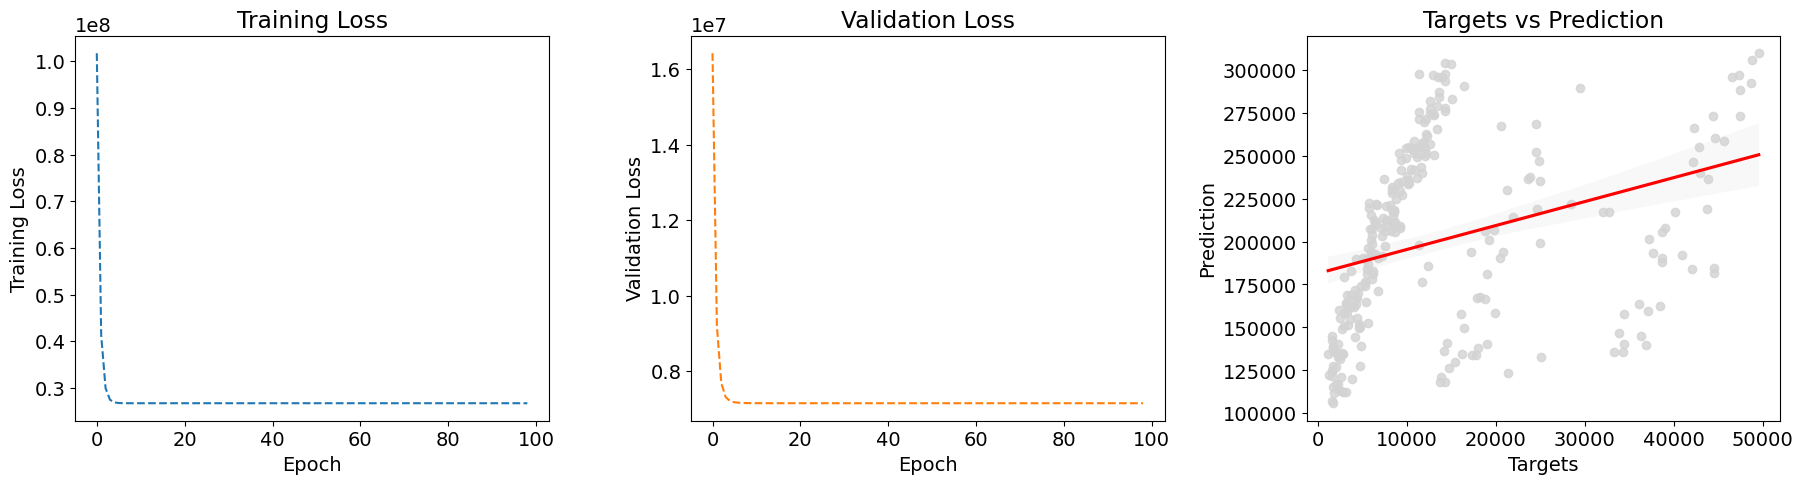

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 5))
fig.subplots_adjust(hspace = .2, wspace = .3)

ax1.plot(TrainingLoss, linestyle = '--')
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss')

ax2.plot(ValidationLoss, 'tab:orange', linestyle = '--', markersize = 5)
ax2.set_title('Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Loss')

ax3 = sns.regplot(data = df_pred, x = 'y', y = 'y_pred', color = 'lightgray', fit_reg = True)
ax3.lines[0].set_color('red')
ax3.set_title('Targets vs Prediction')
ax3.set_xlabel('Targets')
ax3.set_ylabel('Prediction')

plt.show()

[UP](#toc)